In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
data = pd.read_csv("Car_Insurance_Claim.csv")
data = data.replace('none', np.nan)
data.drop(columns=['Unnamed: 0'], inplace=True)
data.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027313918201,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,NaN,poverty,0.3577571170184627,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.4931457852181982,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.2060128507324556,1.0,before 2015,0.0,NaN,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,NaN,working class,0.3883658881572184,1.0,before 2015,0.0,0.0,32765.0,12000.0,sedan,2,0,1,1.0


In [2]:
def plot_per_column_distribution(df, n_graph_shown, n_graph_per_row):
    n_unique = df.nunique()
    df = df[[col for col in df if 1 < n_unique[col] < 50]]

    n_row, n_col = df.shape
    column_names = list(df)

    n_graph_row = math.ceil(n_graph_shown / n_graph_per_row)

    plt.figure(figsize=(6 * n_graph_per_row, 8 * n_graph_row))

    for i, col in enumerate(column_names[:n_graph_shown]):
        plt.subplot(n_graph_row, n_graph_per_row, i + 1)
        column_data = df[col]

        if not np.issubdtype(column_data.dtype, np.number):
            value_counts = column_data.value_counts()
            value_counts.plot.pie(autopct='%1.1f%%', startangle=90)
            plt.ylabel('')  # Remove the default ylabel
        else:
            column_data.hist()

        plt.xticks(rotation=45)
        plt.title(f'{col}', fontsize=12)

    plt.tight_layout()
    plt.show()



Функція **plot_per_column_distribution** автоматизує процес створення графіків для розподілу даних у кожному стовпці DataFrame, спрощуючи аналіз набору даних

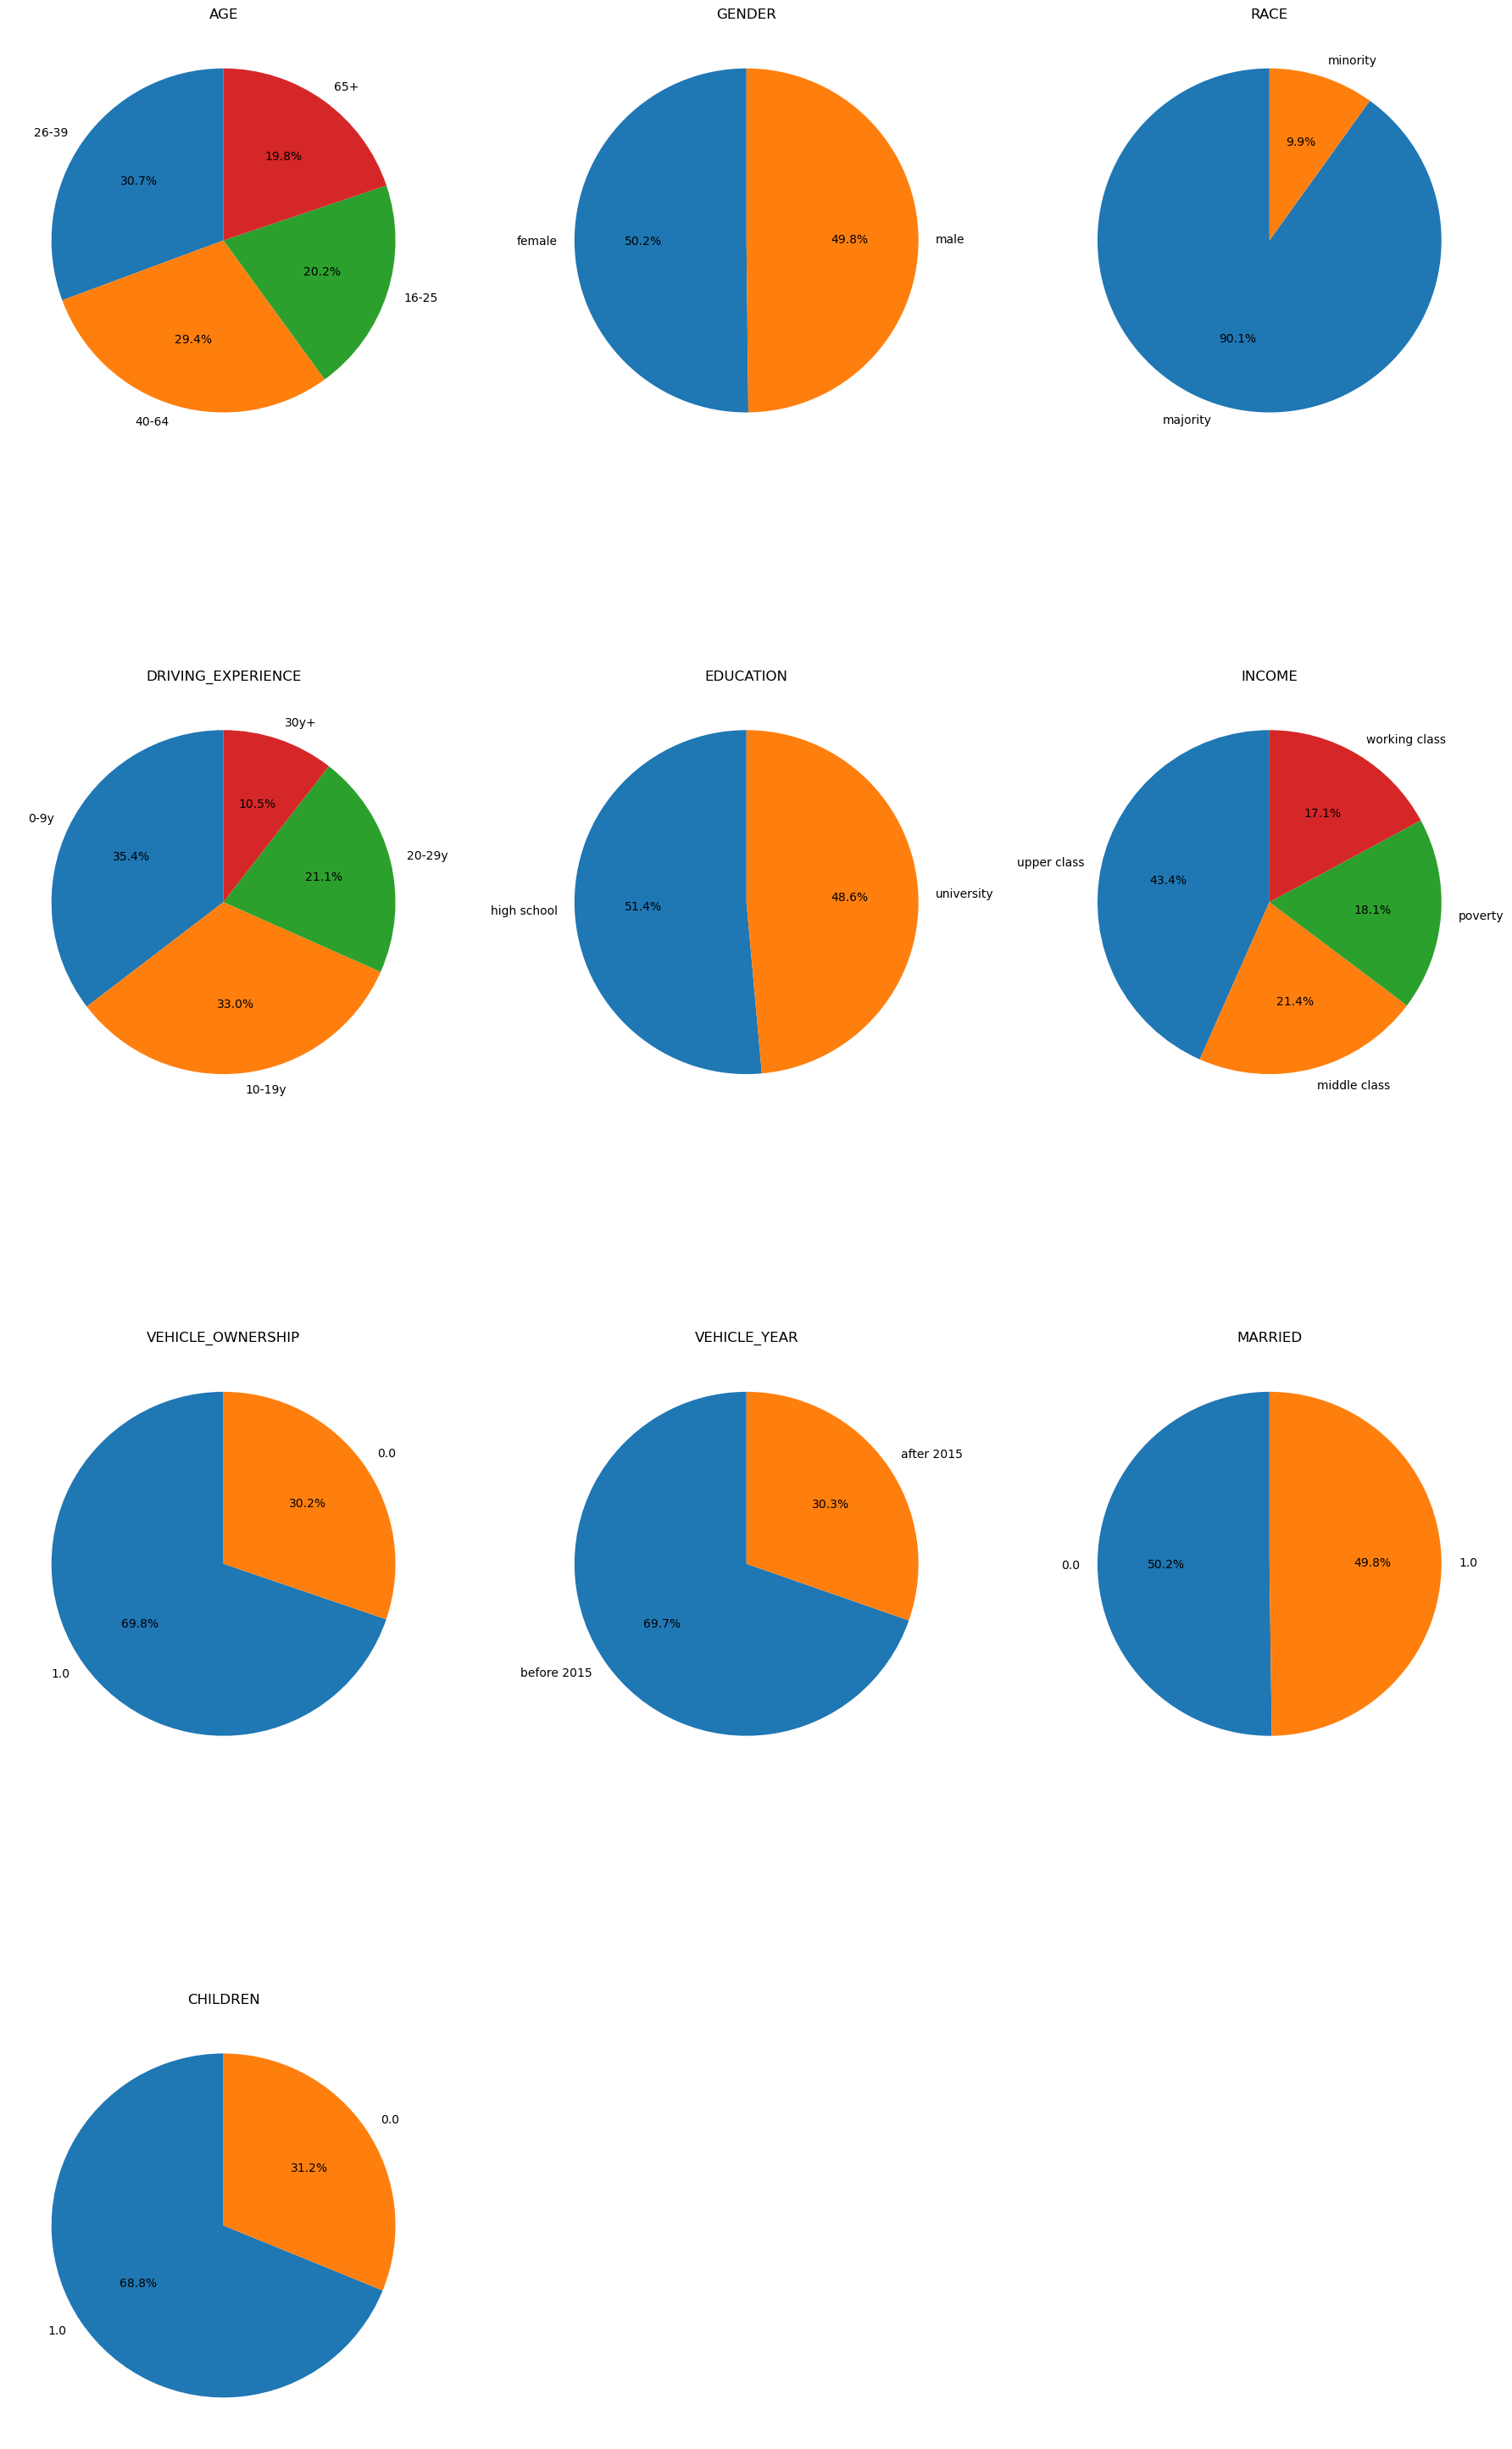

In [3]:
plot_per_column_distribution(data, 10, 3)

### Нище наведено загальні відомості щодо того, що відображає кожна кругова діаграма та як це може бути корисно для аналізу даних.
**AGE** - відображає розподіл різних вікових груп у датасеті. 

**GENDER** - представляє відсоткове співвідношення чоловіків та жінок у датасеті. 

**RACE** - демонструє розподіл різних рас/етнічних груп у датасеті. Це важливо для аналізу соціокультурних впливів на страхові поліси та вибір транспортного засобу.

**DRIVING EXPERIENCE** - відображає розподіл рівня досвіду водіння у датасеті. 

**EDUCATION** - відображає розподіл різних рівнів освіти. 

**INCOME** - показує розподіл рівня доходу. 

**CREDIT SCORE** - відображає розподіл кредитних рейтингів. 

**VEHICLE OWNERSHIP** - відсоткове співвідношення між власниками та не-власниками автомобіля. 

**VEHICLE YEAR** - представляє розподіл за віком автомобілів у датасеті. 

**MARRIED** - діаграма відображає розподіл одружених та незаміжніх осіб. 

**CHILDREN** - показує відсоткове співвідношення тих, хто має дітей та тих, хто ні. 

Розгляд різних факторів, таких як вік, стать, досвід водіння, освіта, рівень доходів та сімейний статус, допомагає точніше визначити страхові тарифи та шанси для кожного клієнта. Це допомагає забезпечити ефективне та персоналізоване страховання до потреб кожного клієнта.

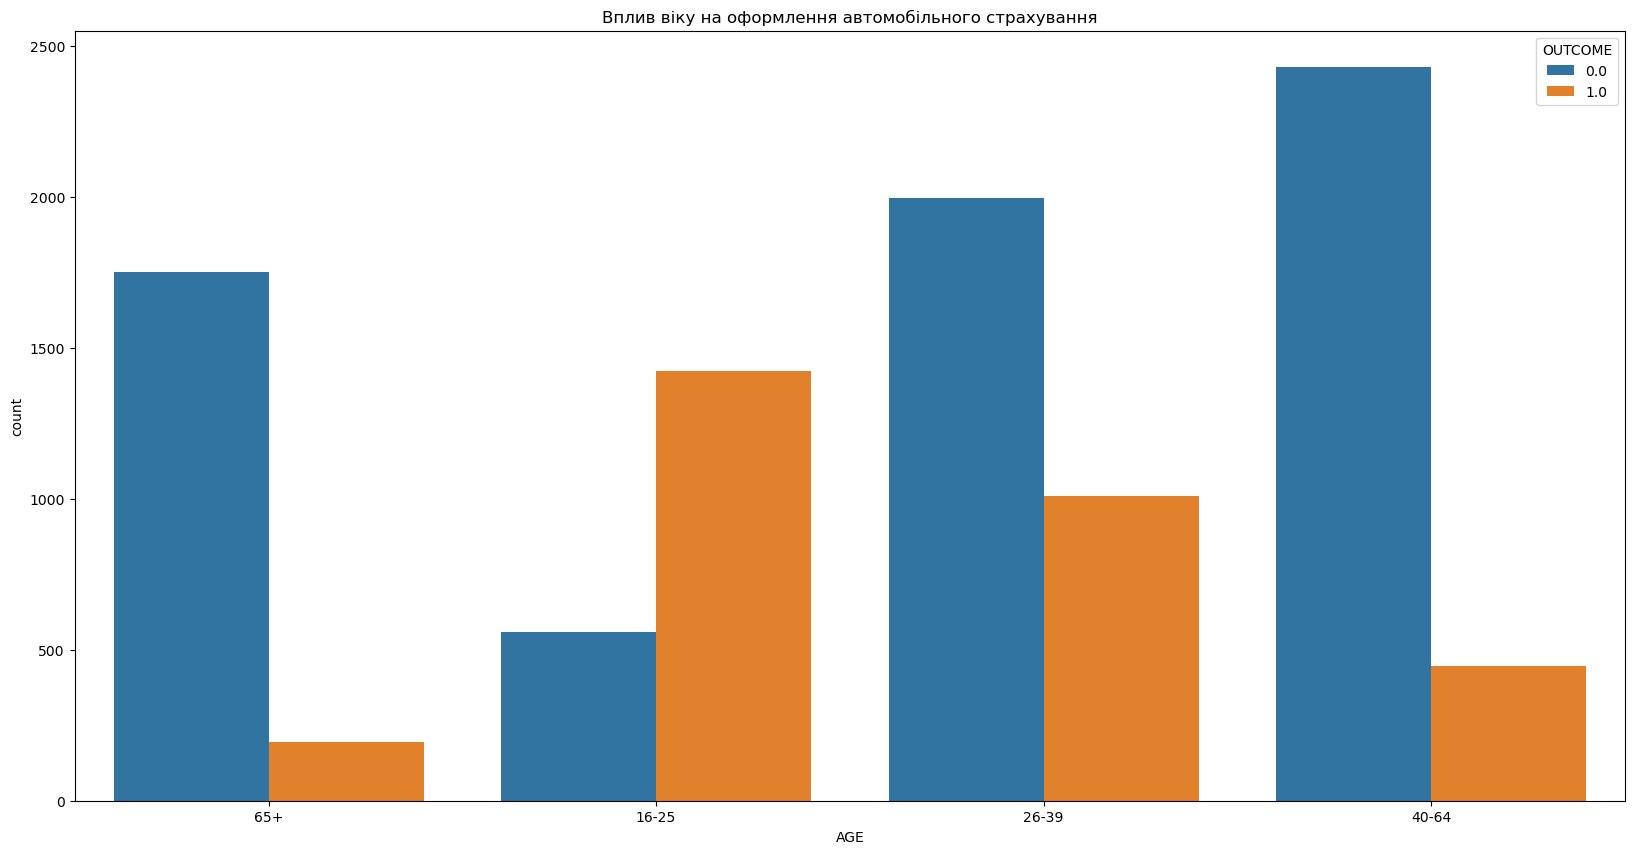

In [27]:
plt.figure(figsize=(20,10))
plt.title('Вплив віку на оформлення автомобільного страхування')
sns.countplot(data=data, x ='AGE', hue='OUTCOME');

На графіку відображено кількість спостережень у кожній віковій категорії. Це дозволить нам оцінити розподіл віку і з'ясувати залежність. Наприклад, у категорії клієнтів віком 16-25 років надано найбільшу кількість страхувань автомобіля.

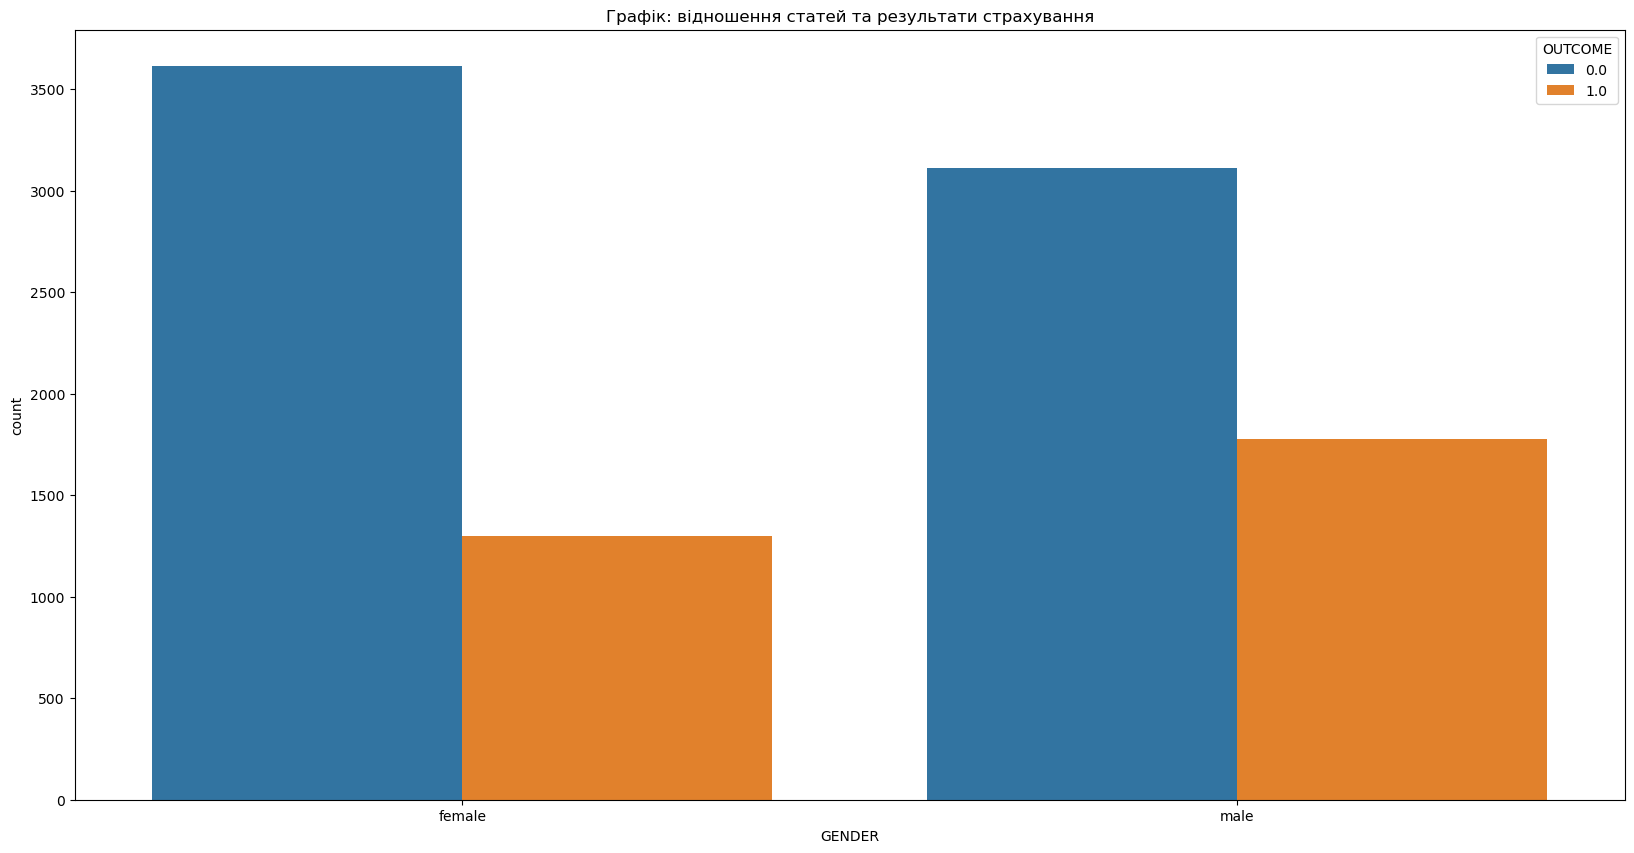

In [26]:
plt.figure(figsize=(20,10))
plt.title('Графік: відношення статей та результати страхування')
sns.countplot(data=data, x ='GENDER', hue='OUTCOME');

Графік розкриває, як різні результати страхових виплат розподілені серед кожної гендерної категорії. Наприклад, ми наочно бачимо, що одна гендерна категорія має значно більшу кількість "позитивних" результатів, це може свідчити про можливий вплив гендеру на ймовірність страхової виплати.

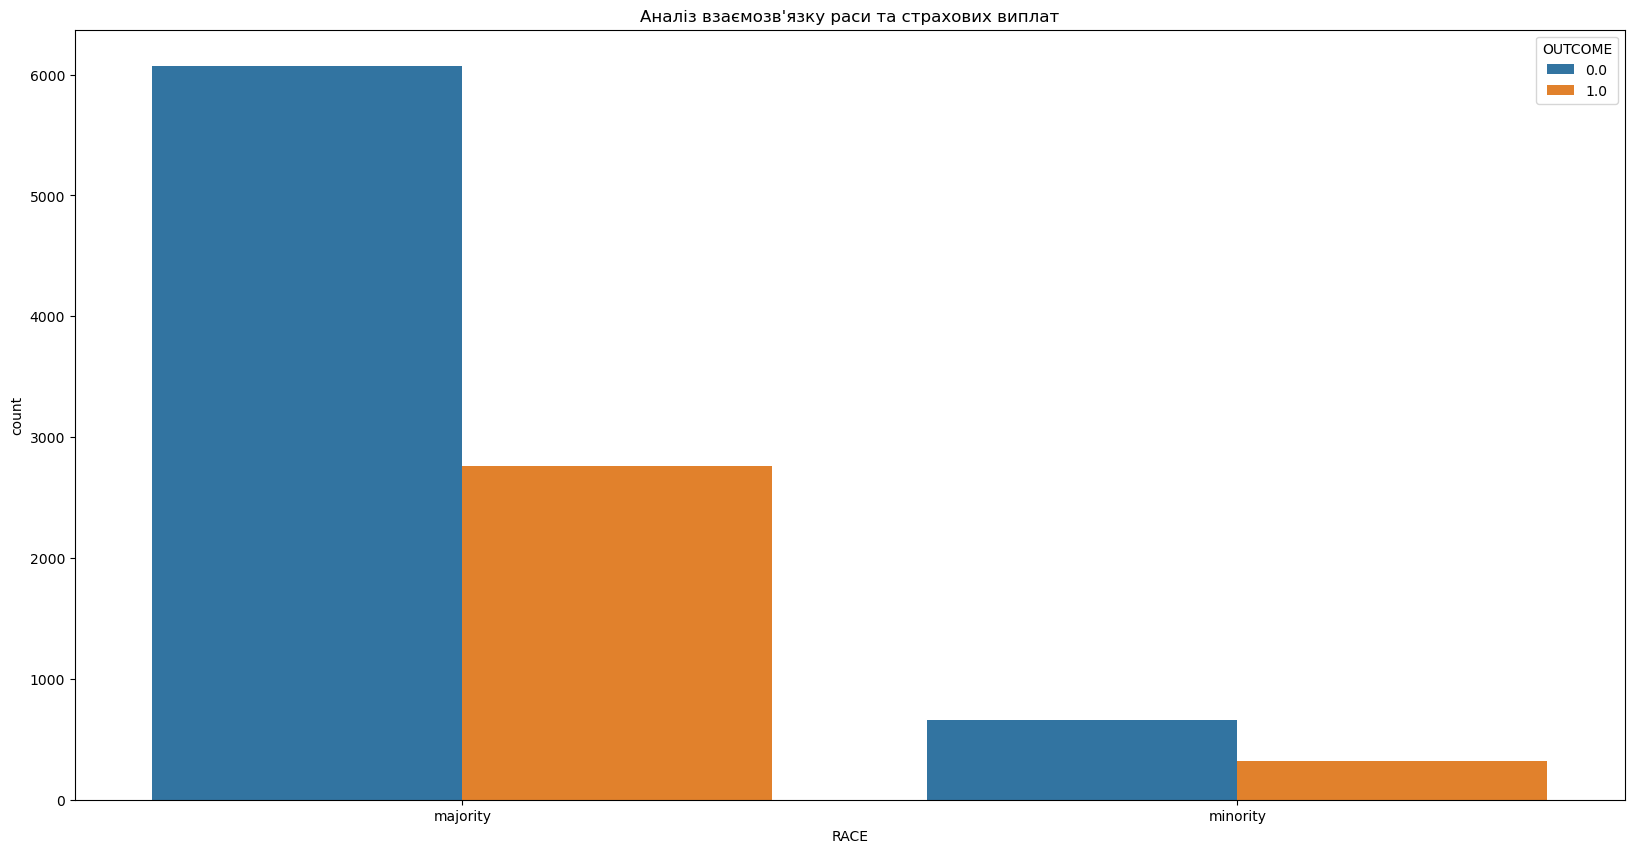

In [6]:
plt.figure(figsize=(20,10))
plt.title("Аналіз взаємозв'язку раси та страхових виплат")
sns.countplot(data=data, x ='RACE', hue='OUTCOME');

Досліджуємо чи є взаємозв'язок між категорією 'RACE' та 'OUTCOME'

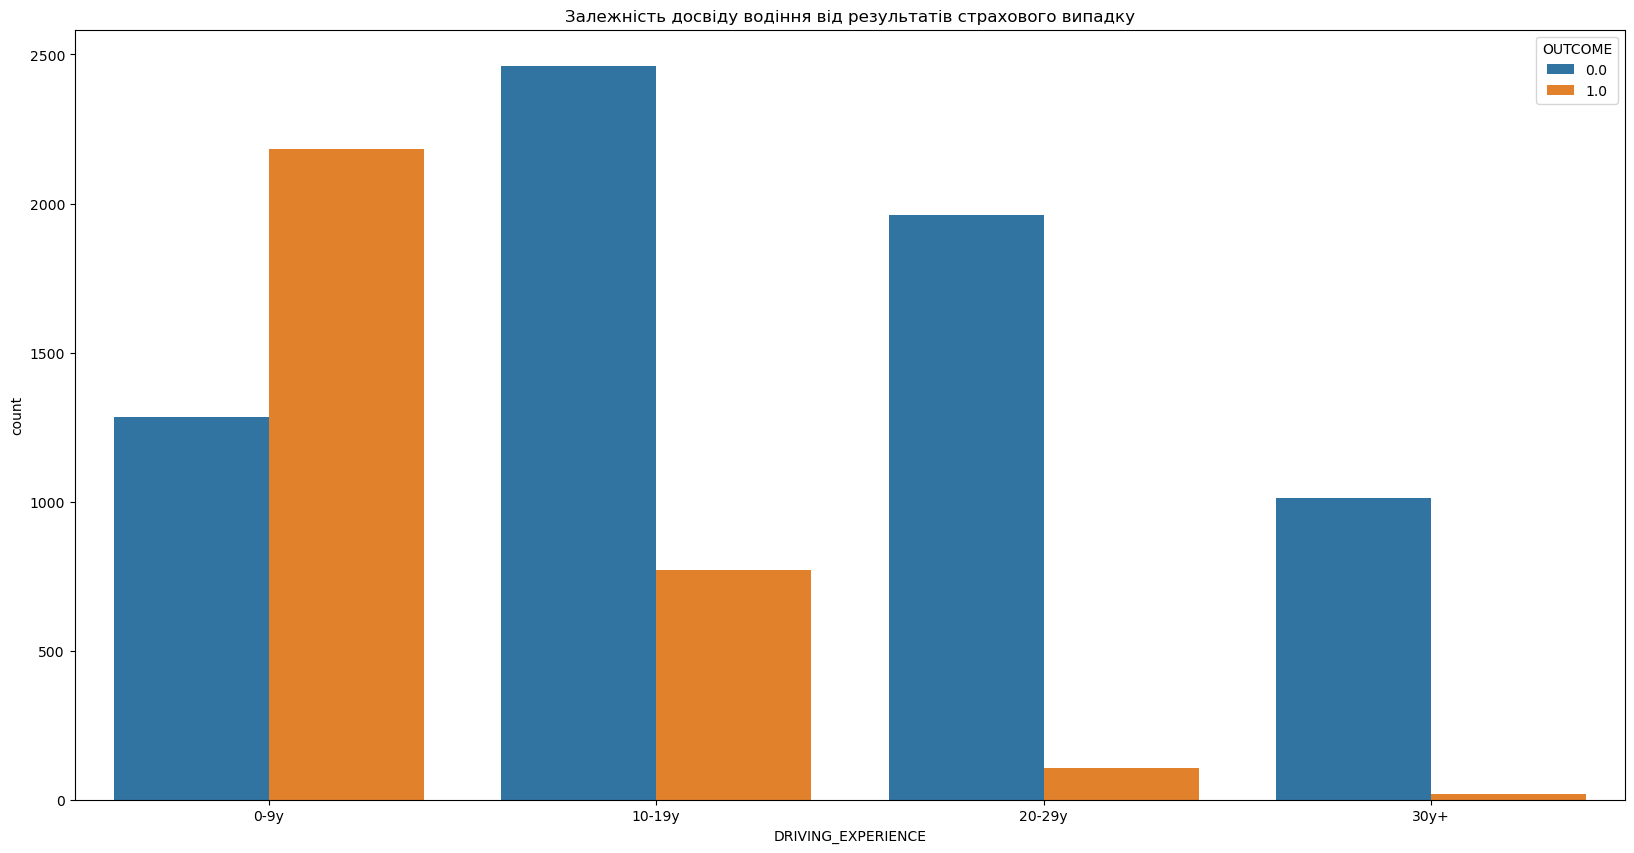

In [25]:
plt.figure(figsize=(20,10))
plt.title('Залежність досвіду водіння від результатів страхового випадку')
sns.countplot(data=data, x ='DRIVING_EXPERIENCE', hue='OUTCOME');

Користувачі досвіт водіння яких складає 0-9 років частіше надають страхові виплати. Ця діаграма дає зрозуміти, який рівень досвіду водіння є важливим фактором при страхуванні автомобіля

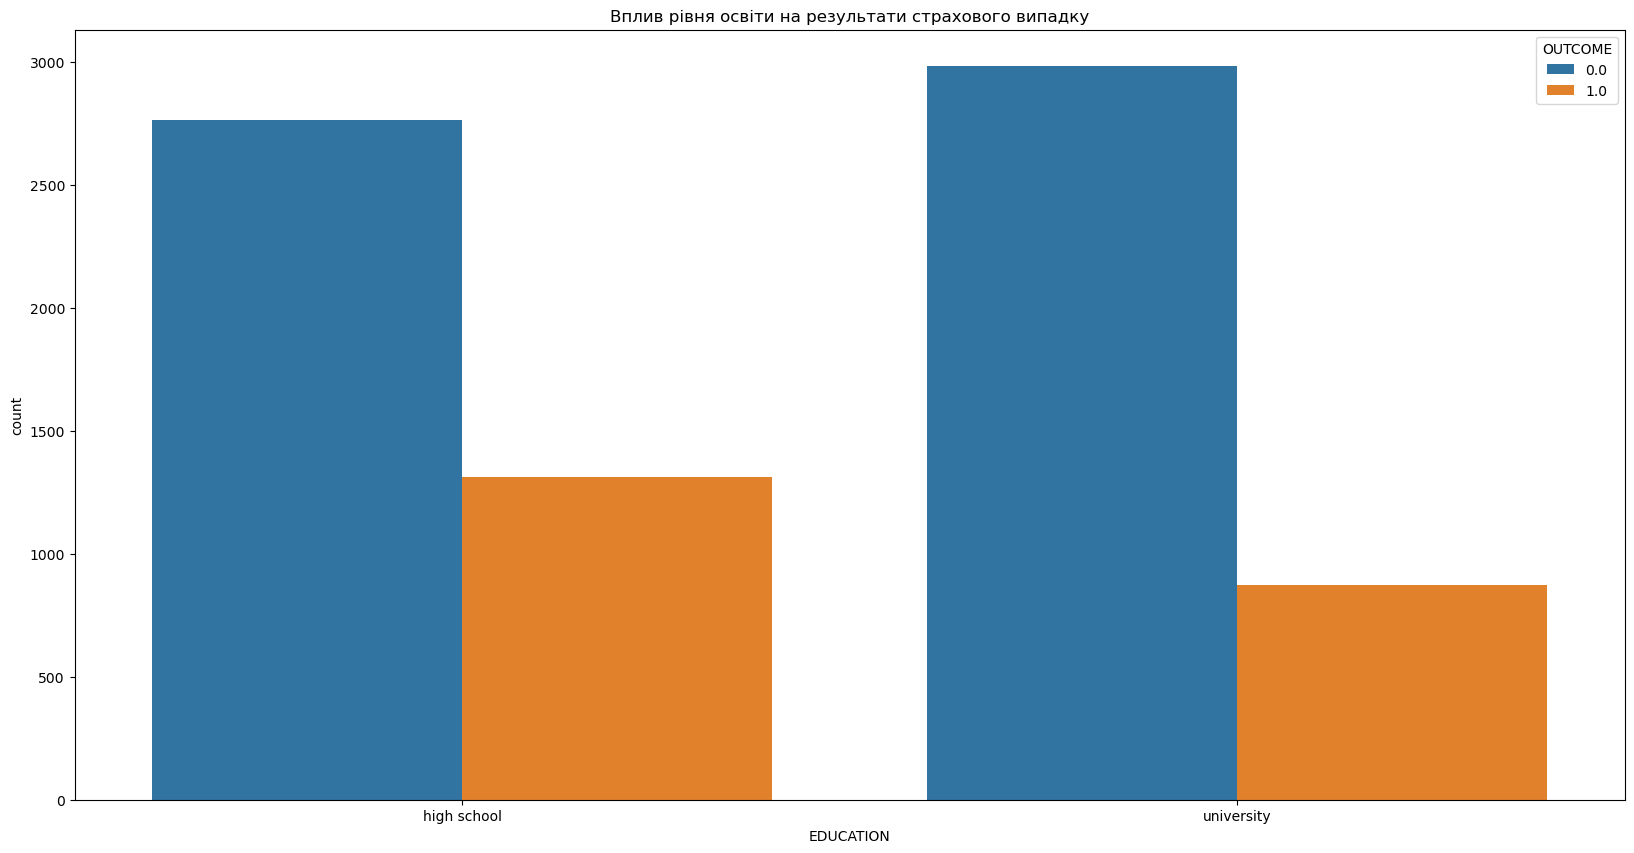

In [24]:
plt.figure(figsize=(20,10))
plt.title('Вплив рівня освіти на результати страхового випадку')
sns.countplot(data=data, x ='EDUCATION', hue='OUTCOME');

Графік показує, що існують взаємозв'язок між рівнем освіти та результатом страхових виплат. Клієнтам які закінчили лише старшу школу частіше погоджують страхування автомобіля

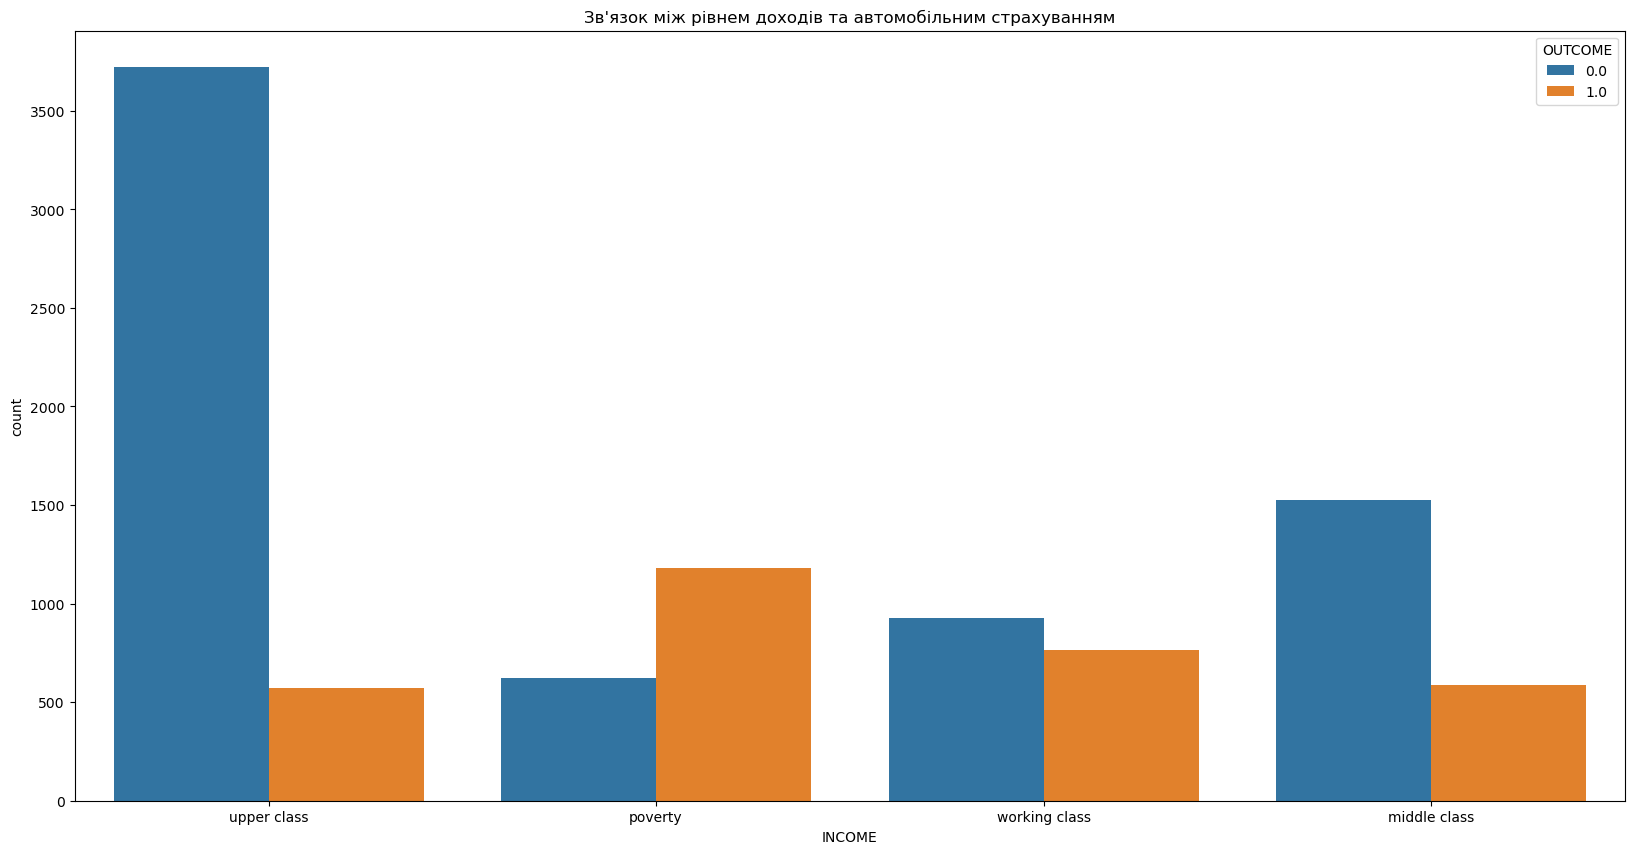

In [23]:
plt.figure(figsize=(20,10))
plt.title("Зв'язок між рівнем доходів та автомобільним страхуванням")
sns.countplot(data=data, x ='INCOME', hue='OUTCOME');

На цьому графіку показано, скільки спостережень є у кожній категорії доходів. Ця інформація допомагає нам зрозуміти розподіл доходів та виявити можливі залежності. Наприклад, ми можемо помітити, що в категоріях з найнижчим рівнем доходів, таких як "прожитковий мінімум" і "робочий клас", має місце відносно висока кількість страховок автомобілів.

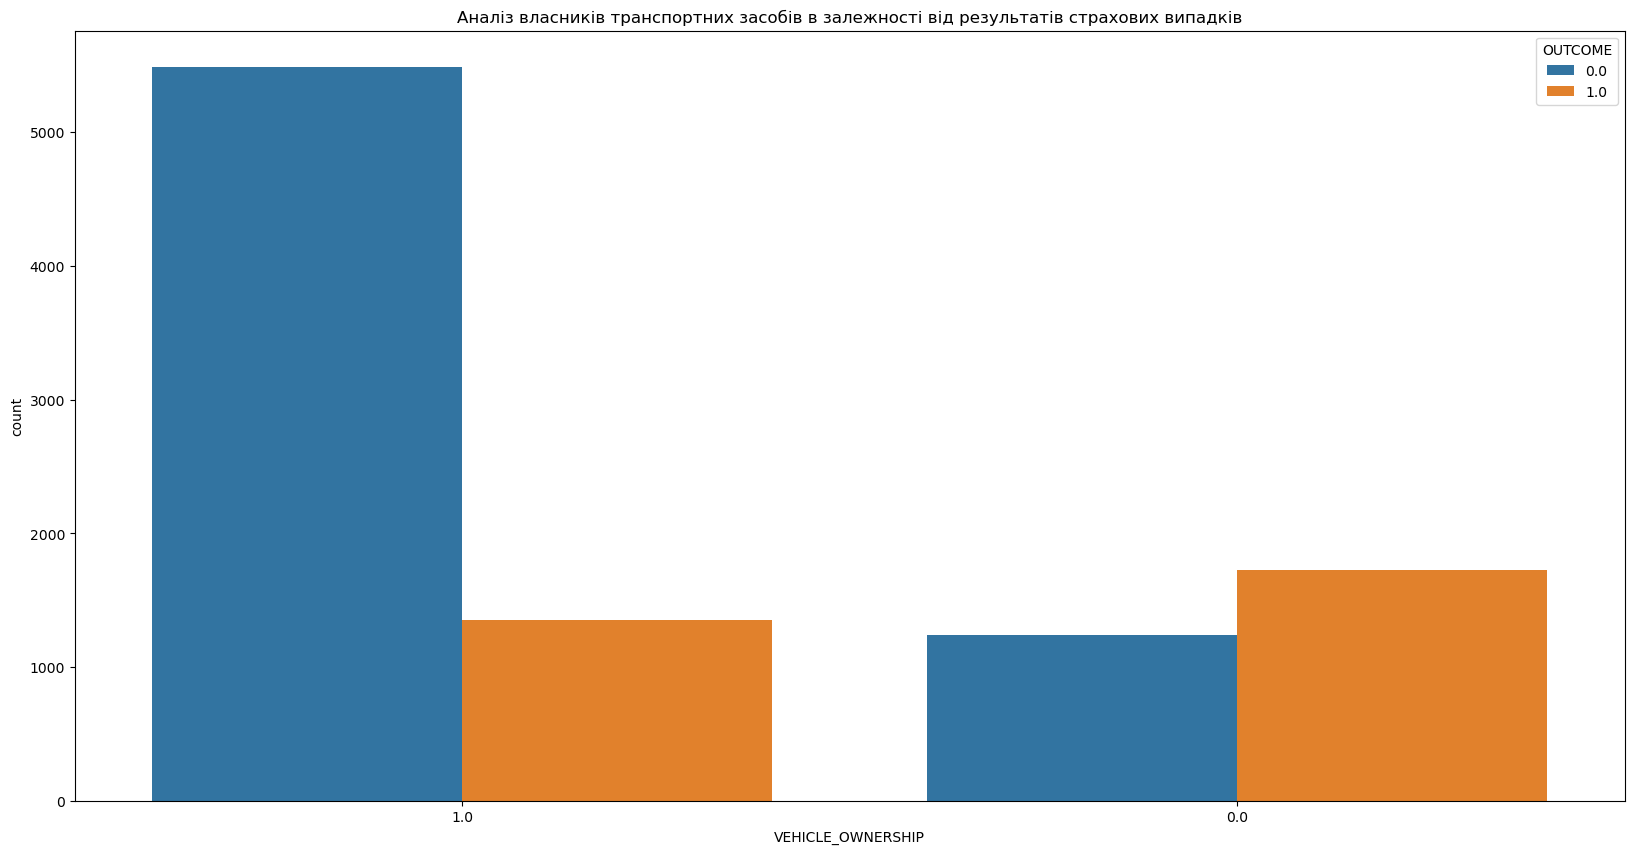

In [10]:
plt.figure(figsize=(20,10))
plt.title('Аналіз власників транспортних засобів в залежності від результатів страхових випадків')
sns.countplot(data=data, x='VEHICLE_OWNERSHIP', hue='OUTCOME');


Графік допомагає візуалізувати, яка кількість власників транспортних засобів отримує позитивну або негативну відповідь на підтвердження страхування автомобіля. Це може бути корисно при подальшому аналізі датасету або при виконанні прогнозування. Наприклад клієнтам які не мають автомобіля не дозволяють застрахувати автомобіль

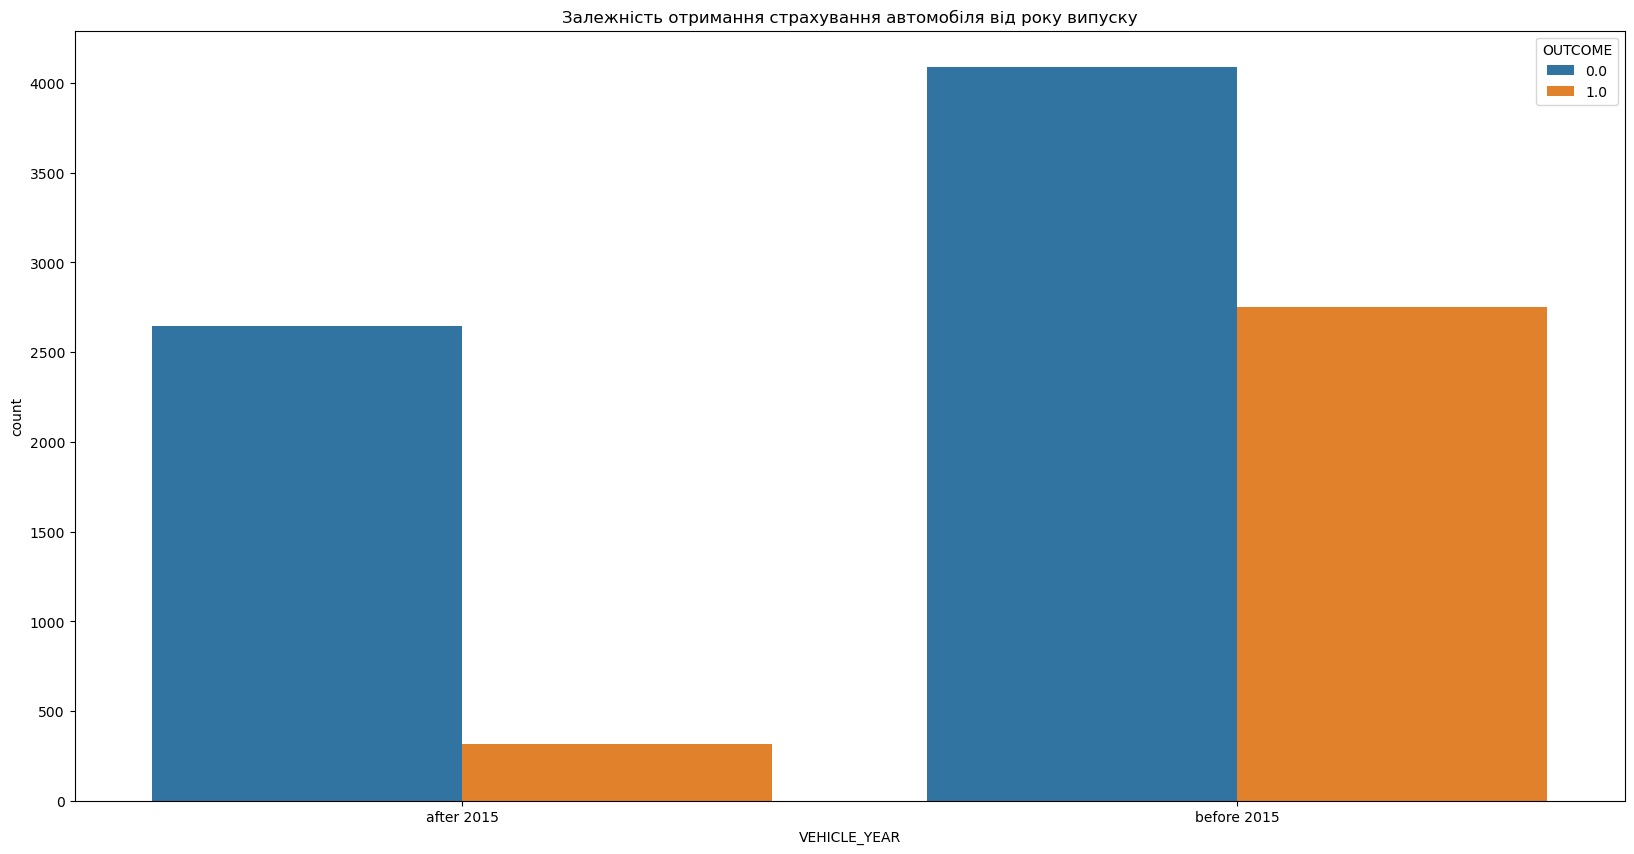

In [11]:
plt.figure(figsize=(20,10))
plt.title('Залежність отримання страхування автомобіля від року випуску')
sns.countplot(data=data, x='VEHICLE_YEAR', hue='OUTCOME');

Графік надає візуальне представлення впливу року випуску транспортного засобу на ймовірність отримання страхового покриття. Наприклад, клієнти з автомобілями, випущеними до 2015 року, можуть частіше мати можливість оформити страховку для свого транспортного засобу.

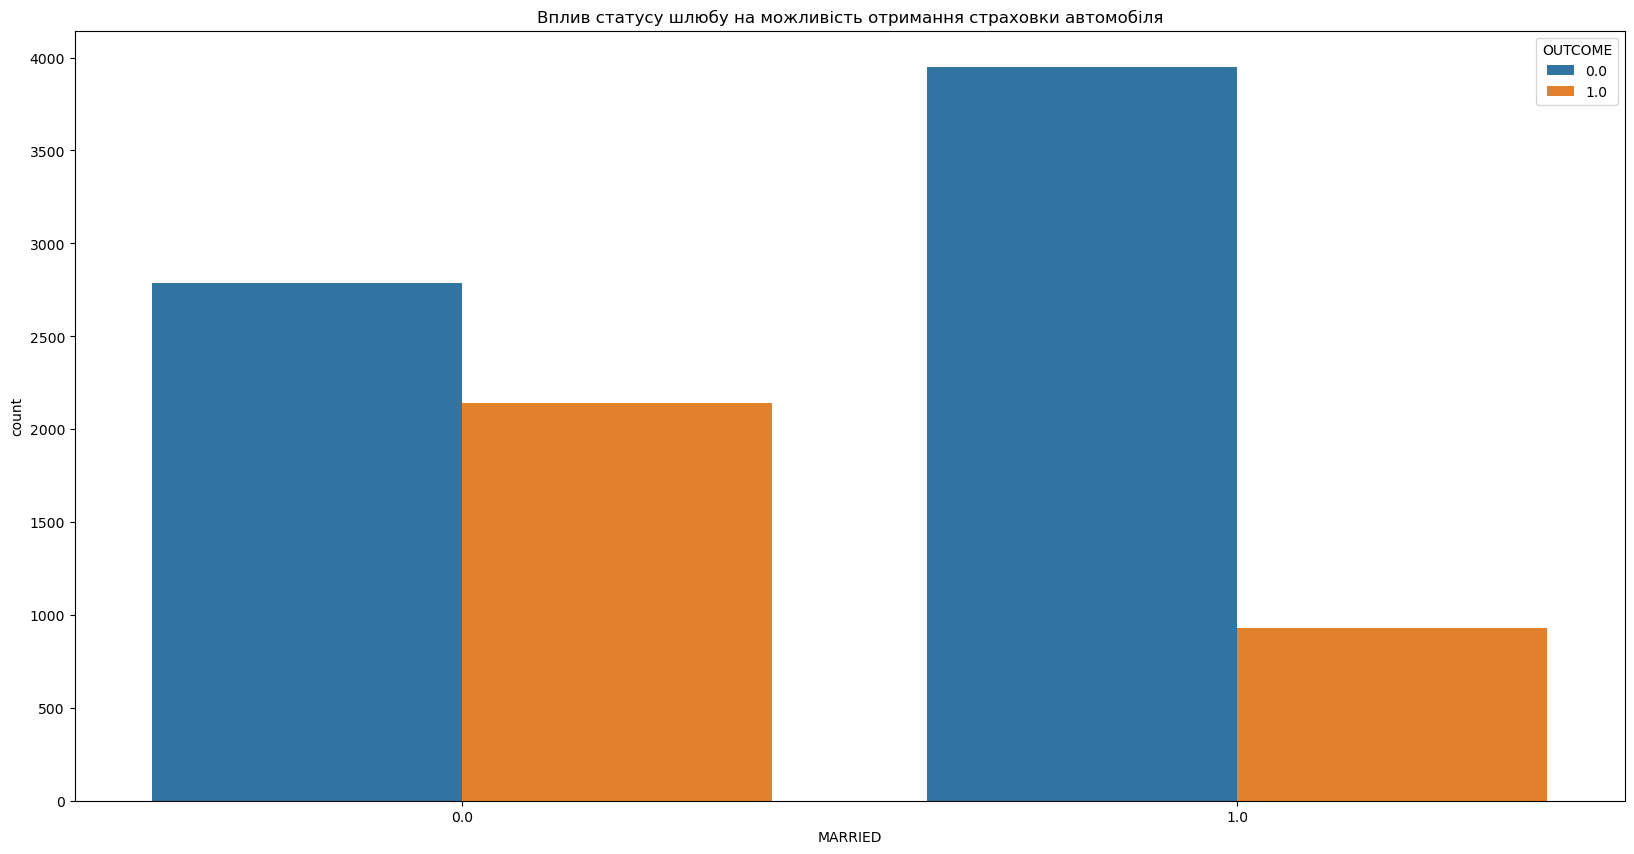

In [12]:
plt.figure(figsize=(20,10))
plt.title('Вплив статусу шлюбу на можливість отримання страховки автомобіля')
sns.countplot(data=data, x='MARRIED', hue='OUTCOME');

Ця діаграма розкриває взаємозв'язок між статусом шлюбу та отриманням страховки. Вона демонструє, як відбувається розподіл отримання страхівки змінюється в залежності від статусу подружжя. 

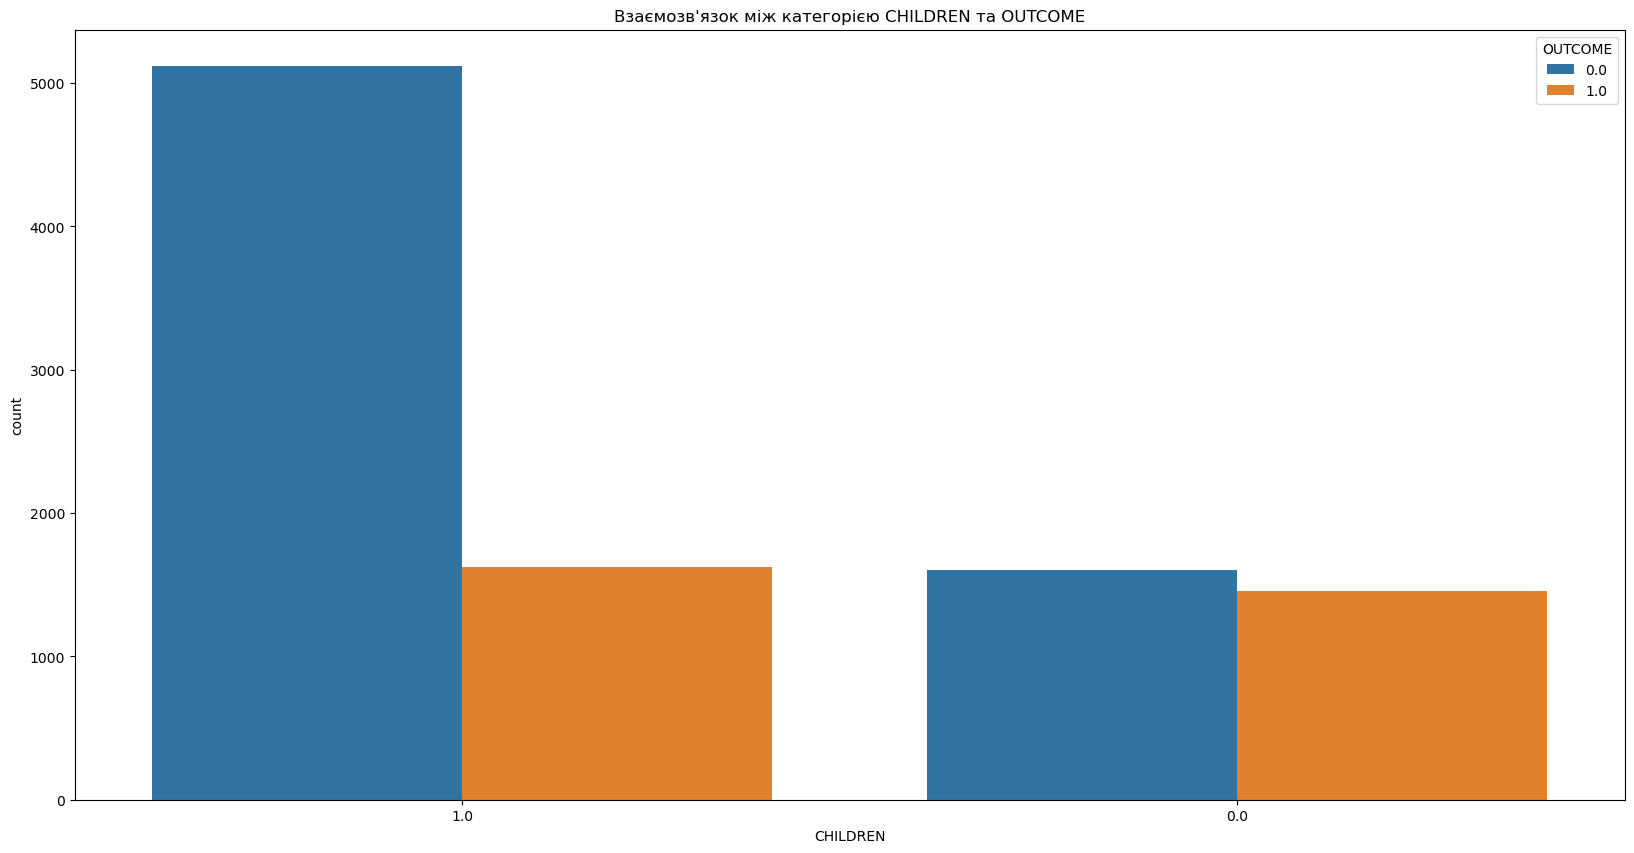

In [22]:
plt.figure(figsize=(20,10))
plt.title("Взаємозв'язок між категорією CHILDREN та OUTCOME")
sns.countplot(data=data, x='CHILDREN', hue='OUTCOME');

Досліджуємо чи є взаємозв'язок між категорією 'CHILDREN' та 'OUTCOME'

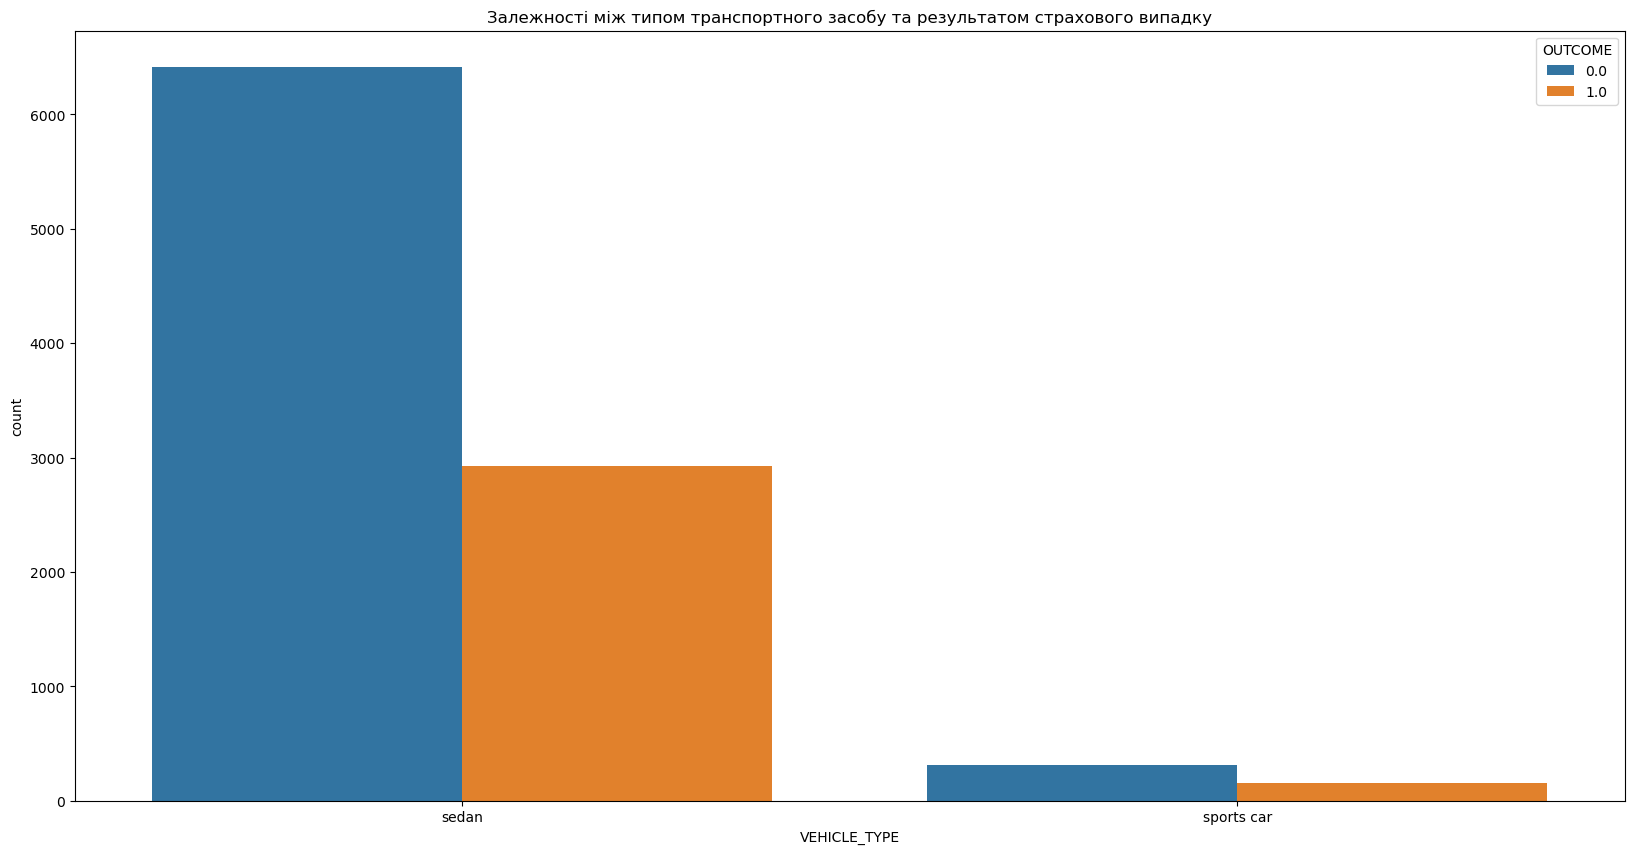

In [14]:
plt.figure(figsize=(20,10))
plt.title('Залежності між типом транспортного засобу та результатом страхового випадку')
sns.countplot(data=data, x='VEHICLE_TYPE', hue='OUTCOME');

Цей код створює графік, що відображає розподіл типів транспортних засобів в залежності від результату страхового випадку. Ми бачимо, як різні типи транспортних засобів розподілені в залежності від результату страхового випадку

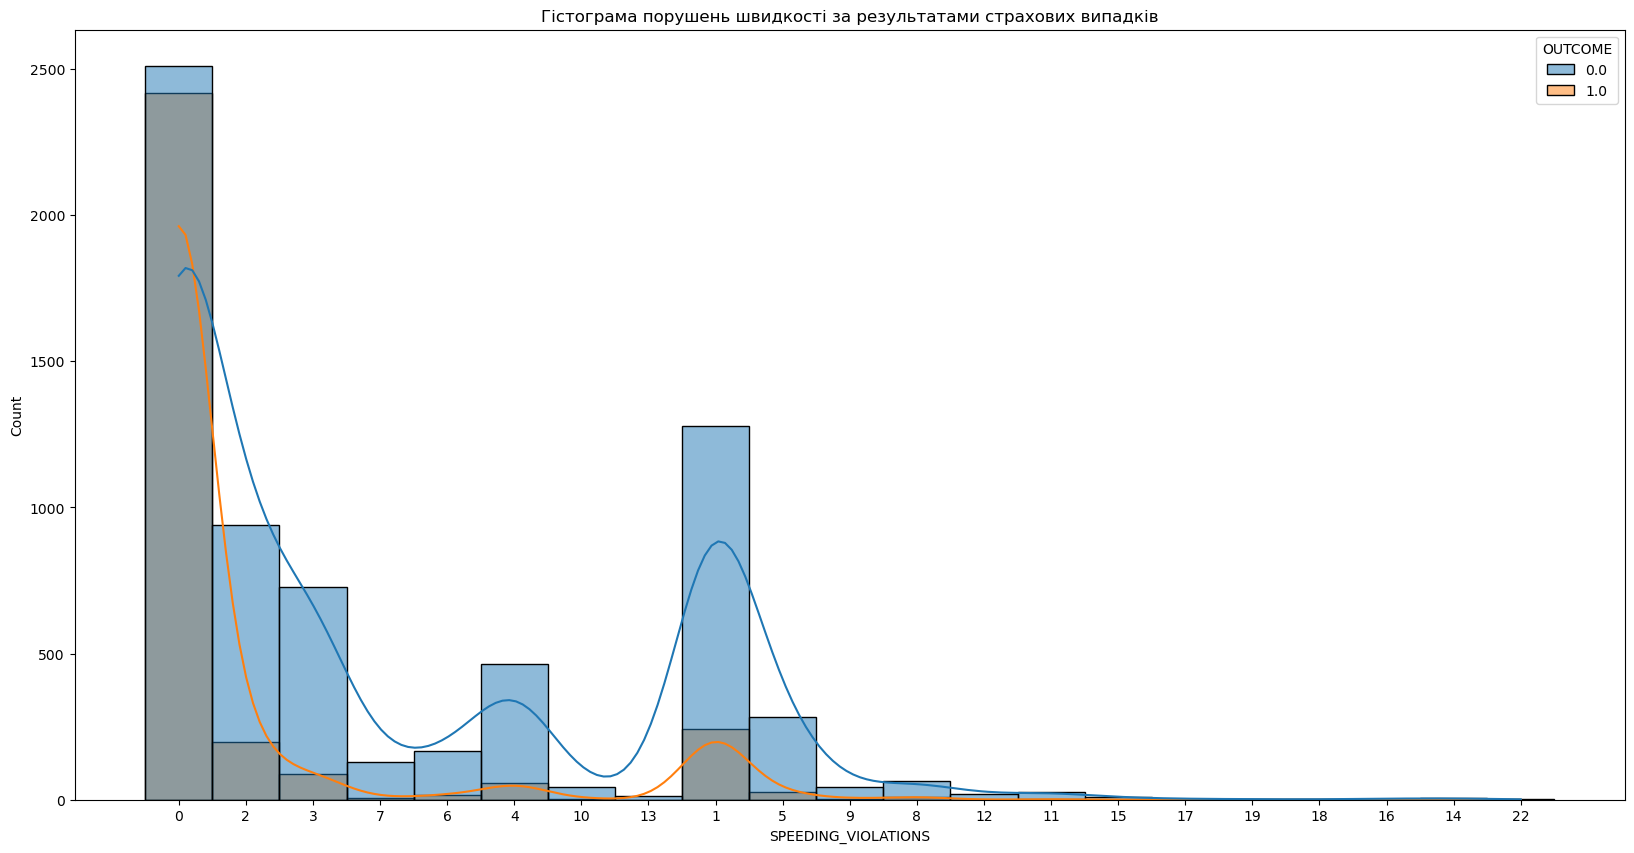

In [15]:
plt.figure(figsize=(20,10))
plt.title('Гістограма порушень швидкості за результатами страхових випадків')
sns.histplot(data=data, x='SPEEDING_VIOLATIONS',hue='OUTCOME', kde=True);

Графік дозволяє аналізувати, як кількість порушень швидкості розподілена серед різних результатів. Забарвлення на графіку відображає різні категорії результатів (наприклад, чи було подано страховий клейм). За допомогою гладкої оцінки щільності (KDE) також можна отримати загальну форму розподілу порушень швидкості.

<Axes: title={'center': 'Кількості попередніх випадків керування у нетверезому стані за результатом отримання стаховки'}, xlabel='DUIS', ylabel='count'>

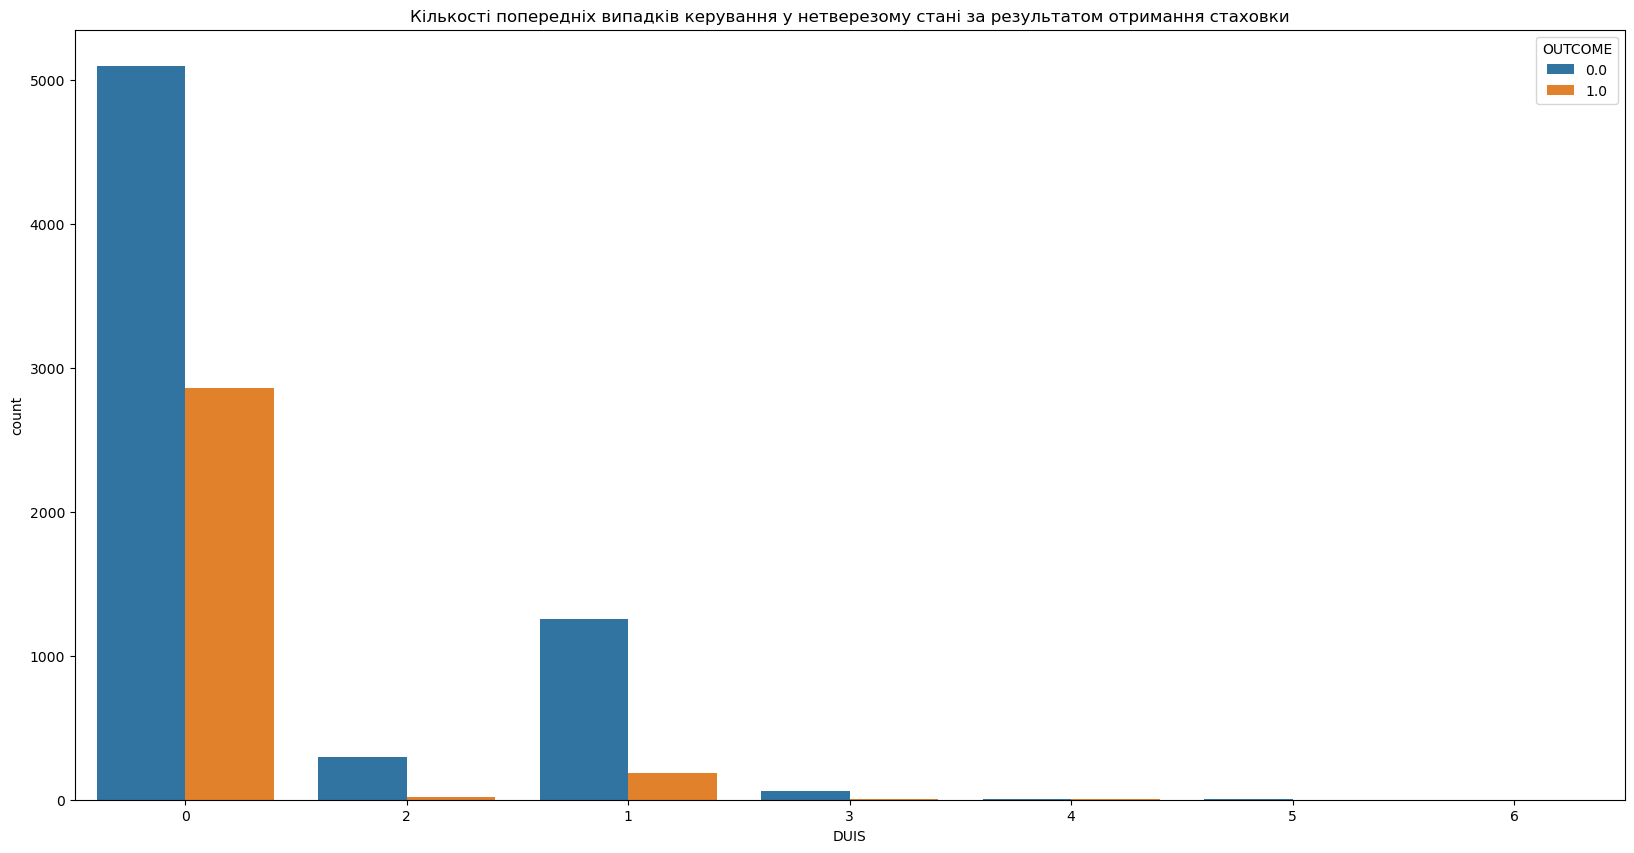

In [18]:
plt.figure(figsize=(20,10))
plt.title('Кількості попередніх випадків керування у нетверезому стані за результатом отримання стаховки')
sns.countplot(data=data, x='DUIS',hue='OUTCOME')

Клієнти, які звертаються щодо отримання страхівки автомобіля, мають більші шанси на успіх, якщо вони мають менше випадків керування у нетверезому стані.

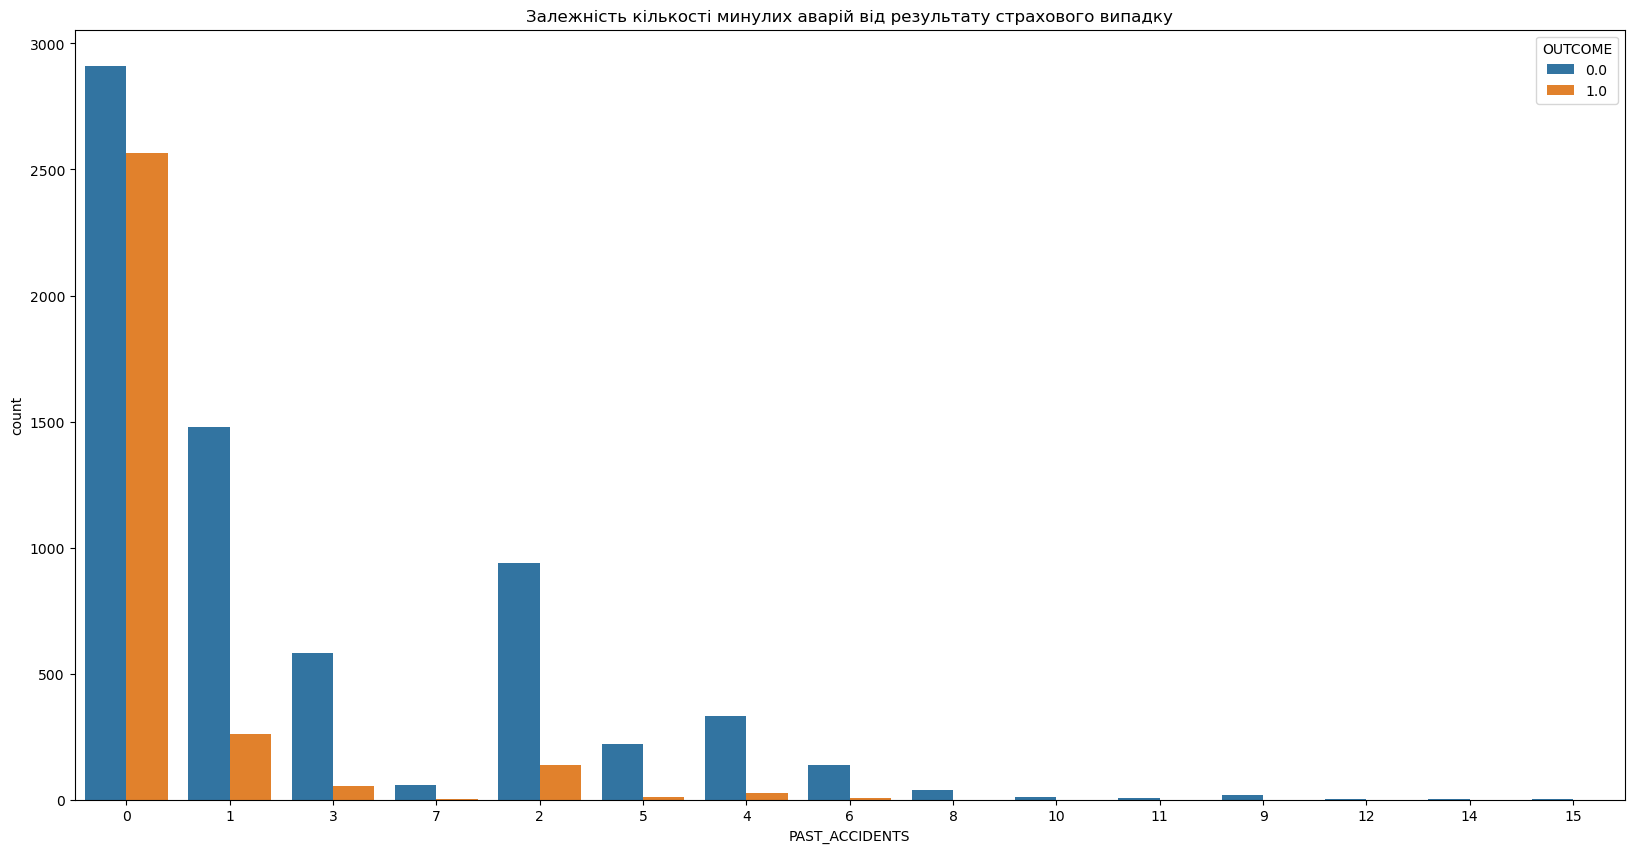

In [19]:
plt.figure(figsize=(20,10))
plt.title('Залежність кількості минулих аварій від результату страхового випадку')
sns.countplot(data = data, x='PAST_ACCIDENTS', hue='OUTCOME');

Графік відображає вплив кількості минулих аварій на ймовірність застрахувати автомобіль. Таким чином, можна визначити наявність тенденції або впливу кількості минулих аварій на результати страхування